In [0]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_score, KFold, train_test_split
from sklearn import preprocessing as prep
from sklearn import utils
from sklearn import svm
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, precision_recall_curve
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.metrics import r2_score, make_scorer
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

In [3]:
dataset_url = '/content/drive/My Drive/coursera/Week 5/week_5_abalone.csv'
data = pd.read_csv(dataset_url)
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [0]:
 data['Sex'] = data['Sex'].map(lambda x: 1 if x == 'M' else (-1 if x == 'F' else 0))

In [5]:
data

,Sex,Length,Diameter,Height,WholeWeight,ShuckedWeight,VisceraWeight,ShellWeight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,-1,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,0,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,-1,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,1,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,1,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,-1,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [6]:
X = data.drop(["Rings"], axis = 1)
y = data["Rings"]
X.shape, y.shape

((4177, 8), (4177,))

Обучите случайный лес (sklearn.ensemble.RandomForestRegressor) с различным числом деревьев: от 1 до 50 (не забудьте выставить "random_state=1" в конструкторе). Для каждого из вариантов оцените качество работы полученного леса на кросс-валидации по 5 блокам. Используйте параметры "random_state=1" и "shuffle=True" при создании генератора кросс-валидации sklearn.cross_validation.KFold. В качестве меры качества воспользуйтесь коэффициентом детерминации (sklearn.metrics.r2_score).

In [7]:
def get_cross_val_scores_clf_parametric(classifier, parameter_name, parameter_values, **kwargs):
    scores = {}
    params = {}
    params.update(kwargs)
    print("testing parameters:", kwargs)
    for test_value in parameter_values:
        params[parameter_name] = test_value
        clf  = classifier(**params)
        clf.fit(X, y)
        scores[test_value] = np.mean(cross_val_score(clf, X, y, cv=KFold(n_splits = 5, shuffle = True, random_state = 1), scoring='r2'))  # make_scorer(r2_score))
    return scores

parameter_name = 'n_estimators'
parameter_values = range(1, 51)
model_parameters = {'random_state':1}

result = get_cross_val_scores_clf_parametric(RandomForestRegressor, parameter_name, parameter_values, **model_parameters)



testing parameters: {'random_state': 1}


In [12]:
result_mean = pd.DataFrame(map(np.mean, result.values()))
for k,v in result.items():
    print(k, v, round(v, 2))

1 0.10967482068860261 0.11
2 0.3413000096365689 0.34
3 0.406433829066129 0.41
4 0.4447745857536912 0.44
5 0.46503241426823594 0.47
6 0.47139595825898917 0.47
7 0.4766658451893487 0.48
8 0.4829348394224631 0.48
9 0.4894370162945041 0.49
10 0.4954085552428177 0.5
11 0.4944111155773555 0.49
12 0.49902817866563326 0.5
13 0.5030578549564464 0.5
14 0.5073168234618861 0.51
15 0.5091809969556578 0.51
16 0.5114105314179662 0.51
17 0.5148917747729636 0.51
18 0.5172203573170132 0.52
19 0.5198293095329432 0.52
20 0.51948435033775 0.52
21 0.520529096463528 0.52
22 0.5208044230080824 0.52
23 0.521742855685855 0.52
24 0.5231059969795335 0.52
25 0.5232486470488318 0.52
26 0.5243076139284634 0.52
27 0.5246393588459404 0.52
28 0.5256557724971402 0.53
29 0.5265556293057552 0.53
30 0.5270858715838138 0.53
31 0.5276420438225101 0.53
32 0.5289244806388986 0.53
33 0.5301073722643779 0.53
34 0.5299613734264366 0.53
35 0.5298209779129148 0.53
36 0.529910050667947 0.53
37 0.5294320415136227 0.53
38 0.5294715388

In [14]:
result_mean.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49
0,0.109675,0.3413,0.406434,0.444775,0.465032,0.471396,0.476666,0.482935,0.489437,0.495409,0.494411,0.499028,0.503058,0.507317,0.509181,0.511411,0.514892,0.51722,0.519829,0.519484,0.520529,0.520804,0.521743,0.523106,0.523249,0.524308,0.524639,0.525656,0.526556,0.527086,0.527642,0.528924,0.530107,0.529961,0.529821,0.52991,0.529432,0.529472,0.529516,0.52947,0.529809,0.530043,0.529914,0.529681,0.528908,0.529008,0.529179,0.530051,0.530813,0.530951


<Figure size 1296x720 with 0 Axes>

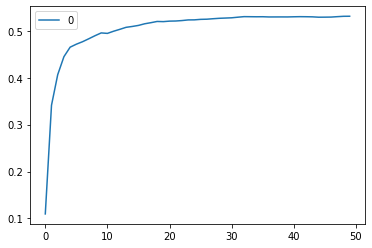

In [16]:
plt.figure(figsize=(18,10))
result_mean.plot()

In [15]:
result_mean[result_mean[0]>.52][:5]

,0
20,0.520529
21,0.520804
22,0.521743
23,0.523106
24,0.523249


In [10]:
dataset_path = '/content/drive/My Drive/coursera/Week 5/week_5_gbm-data.csv'
data = pd.read_csv(dataset_path)
data

,Activity,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,D32,D33,D34,D35,D36,D37,D38,D39,...,D1737,D1738,D1739,D1740,D1741,D1742,D1743,D1744,D1745,D1746,D1747,D1748,D1749,D1750,D1751,D1752,D1753,D1754,D1755,D1756,D1757,D1758,D1759,D1760,D1761,D1762,D1763,D1764,D1765,D1766,D1767,D1768,D1769,D1770,D1771,D1772,D1773,D1774,D1775,D1776
0,1,0.000000,0.497009,0.10,0.0,0.132956,0.678031,0.273166,0.585445,0.743663,0.243144,0.187856,0.0000,0.000000,0.069000,0.362012,0.301773,0.597930,0.190813,0.107219,0.070500,0.00717,0.137931,1,0.00,0.496683,0.753131,1,1,0.000000,0.262919,0.077200,0.082700,0.200590,0.00000,0.000000,0.000000,0.00,0.162383,0.150153,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0.366667,0.606291,0.05,0.0,0.111209,0.803455,0.106105,0.411754,0.836582,0.106480,0.101382,0.1875,0.193548,0.131001,0.350206,0.187419,0.762669,0.180473,0.329962,0.107681,0.01950,0.206897,0,0.75,0.449869,0.720484,0,0,0.666667,0.099400,0.289240,0.216710,0.100295,0.16958,0.235294,0.000000,0.00,0.119104,0.075100,...,0,1,1,0,0,0,1,1,0,1,0,0,1,0,1,1,1,0,0,0,1,0,0,0,1,0,1,1,0,0,1,1,1,1,0,1,0,0,1,0
2,1,0.033300,0.480124,0.00,0.0,0.209791,0.610350,0.356453,0.517720,0.679051,0.352308,0.193548,0.1250,0.000000,0.068900,0.574628,0.283327,0.510633,0.184480,0.073300,0.061600,0.00566,0.000000,1,0.00,0.486610,0.803577,0,1,0.000000,0.428659,0.032400,0.072400,0.000000,0.03930,0.000000,0.000000,0.00,0.076100,0.225229,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0.000000,0.538825,0.00,0.5,0.196344,0.724230,0.235606,0.288764,0.805110,0.208989,0.000000,0.0000,0.000000,0.145947,0.584688,0.325247,0.496745,0.242288,0.087700,0.075300,0.01680,0.000000,1,0.00,0.459122,0.829482,0,1,0.000000,0.435410,0.118562,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.068900,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.100000,0.517794,0.00,0.0,0.494734,0.781422,0.154361,0.303809,0.812646,0.125177,0.532258,0.0000,0.000000,0.094900,0.540323,0.116775,0.552982,0.167897,0.116140,0.054200,0.01350,0.103448,1,0.00,0.381883,0.913374,0,1,0.000000,0.305333,0.054100,0.170822,0.000000,0.00000,0.176471,0.000000,0.00,0.019900,0.057400,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3746,1,0.033300,0.506409,0.10,0.0,0.209887,0.633426,0.297659,0.376124,0.727093,0.308163,0.000000,0.0000,0.000000,0.071800,0.362006,0.229374,0.603893,0.129706,0.092400,0.036100,0.00473,0.069000,1,0.00,0.486439,0.783710,1,1,0.000000,0.364694,0.136861,0.047300,0.100295,0.00000,0.000000,0.000000,0.00,0.223324,0.000000,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3747,1,0.133333,0.651023,0.15,0.0,0.151154,0.766505,0.170876,0.404546,0.787935,0.192527,0.085200,0.2500,0.064500,0.121309,0.347521,0.250846,0.660747,0.221975,0.167944,0.065700,0.00939,0.172414,1,0.00,0.390864,0.815279,0,1,0.000000,0.153533,0.127563,0.122141,0.104815,0.08000,0.191429,0.146735,0.00,0.101137,0.075100,...,1,1,0,1,1,1,1,0,1,0,0,1,0,0,0,0,1,1,1,0,1,0,0,0,1,1,1,1,1,0,0,0,1,0,1,0,1,0,0,0
3748,0,0.200000,0.520564,0.00,0.0,0.179949,0.768785,0.177341,0.471179,0.872241,0.122132,0.624027,0.1875,0.064500,0.091700,0.519094,0.243037,0.691896,0.215831,0.338637,0.290643,0.04450,0.103448,1,0.00,0.590995,0.581372,0,0,0.333333,0.128839,0.357203,0.077600,0.028500,0.06200,0.308468,0.166667,0.00,0.019900,0.377263,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3749,1,0.100000,0.765646,0.00,0.0,0.536954,0.634936,0.342713,0.447162,0.672689,0.37293

In [0]:
X = data.drop(["Activity"], axis = 1)
y = data["Activity"]

In [27]:
X.shape, y.shape

((3751, 1776), (3751,))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                      test_size=0.8, random_state=241)

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import log_loss

In [0]:
train_logloss = {}
test_logloss = {}
learning_rates = [1, 0.5, 0.3, 0.2, 0.1]
for learning_rate in learning_rates:
    clf = GradientBoostingClassifier(n_estimators=250, random_state=241, learning_rate=learning_rate)  # verbose=True,
    clf.fit(X_train, y_train)
    train_logloss[learning_rate] = [log_loss(y_train, probability) for i, probability in enumerate(clf.staged_predict_proba(X_train))]
    test_data[learning_rate] = [log_loss(y_test, probability) for i, probability in enumerate(clf.staged_predict_proba(X_test))]

1 red
0.5 orange
0.3 yellow
0.2 green
0.1 blue


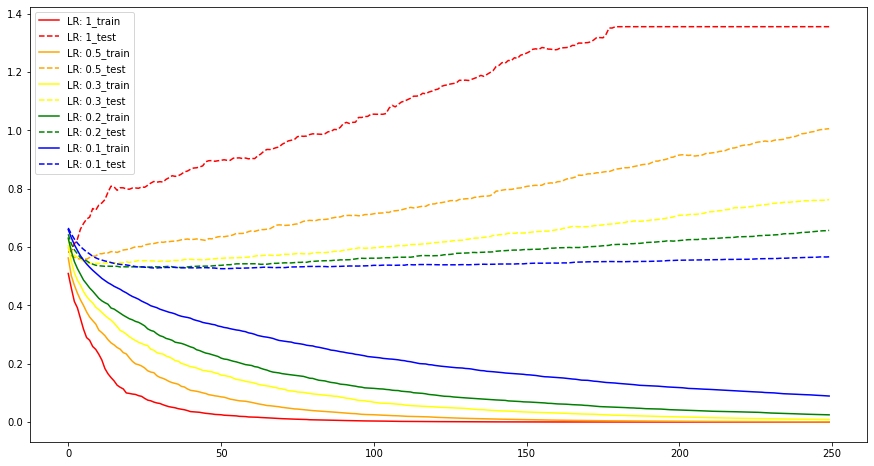

In [63]:
plt.figure(figsize=(15,8))
for name, color in zip(learning_rates, ['red','orange','yellow','green','blue']):
    plt.plot(train_logloss[name], color = color, label = "LR: "+str(name)+'_train')
    plt.plot(test_data[name], color = color, linestyle = 'dashed', label = "LR: "+str(name)+'_test')
plt.legend(loc='upper left')
plt.show()

In [67]:
q2_answer = pd.DataFrame(test_data[0.2])
q2_answer.min()[0], q2_answer.idxmin()[0]

(0.5301645204906471, 36)

In [73]:
clf_rdnmforest = RandomForestClassifier(n_estimators=36, random_state=241)
clf_rdnmforest.fit(X_train, y_train)
y_pred_forest = clf_rdnmforest.predict_proba(X_test)
log_loss(y_test, y_pred_forest)

0.5415685811957381

In [74]:
clf_rdnmforest = RandomForestClassifier(n_estimators=333, random_state=241)
clf_rdnmforest.fit(X_train, y_train)
y_pred_forest = clf_rdnmforest.predict_proba(X_test)
log_loss(y_test, y_pred_forest)

0.5244323645245831